# Part II - (Prosper Loan DataSet Analysis)
## by (Boris MVE MANGA)


## Investigation Overview

>For the presentation, we'll start with the multivariate correlation between the features like **LoanOriginalAmount** and **MonthlyLoanPayment** and Loan **Term**. Then we'll present the correlation between **ProsperScore** and **BorrowerAPR** and the impact of Loan term. Finally We'll present the **BorrowerStatus** distribution and also the **Loan term** distribution


## Dataset Overview

> This data set contains 113,937 loans data with 81 variables on each loan, including loan amount, borrower rate, Interest rate, current loan status, borrower income, Monthly Loan Payments, Borrower State, Loan term and many other features.

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
#Import the dataset into pandas
loan = pd.read_csv('prosperLoanData.csv');

#Selecting the colums of interest
cols_sub = ['LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield', 
              'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 
              'ProsperScore', 'Term', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 
              'AmountDelinquent', 'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans', 
              'MonthlyLoanPayment','Recommendations', 'BorrowerState','LoanOriginalAmount', 
            'IsBorrowerHomeowner'];

#Extracting only the above columns
loan_sub = pd.DataFrame(loan, columns=cols_sub);

In [21]:
#Function to plot the Labels
def labels(x,y,t):
    plt.xlabel(x);
    plt.ylabel(y);
    plt.title(t);
    plt.show();

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Effect of Loan Term on  :  **LoanOriginalAmount** VS **MonthlyLoanPayment** 

> We'll present the correlation between Loan original Amount and Monthly loan Payments and the Impact of Loan Term in this correlation
 

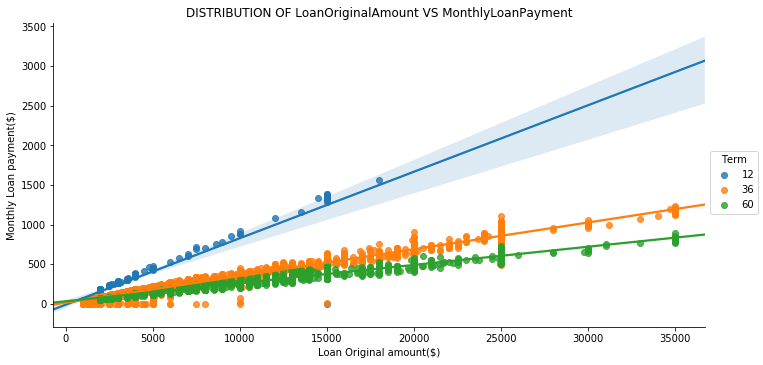

In [22]:
#Randomly select some samples
np.random.seed(5)
loan_samples = loan_sub.sample(10000)

# Scatter Plot with Hue=Term
sb.lmplot(data=loan_samples, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', hue='Term', size=5, aspect=2);   

#Call the labels function
labels("Loan Original amount($)","Monthly Loan payment($)","DISTRIBUTION OF LoanOriginalAmount VS MonthlyLoanPayment");

Comments: There are **3 Positives Regression Lines** for each value of **Loan Term**.

## Impact of Loan term on : **ProsperScore** VS **BorrowerAPR** 

We'll present the relation between ProsperScore and BorrowerAPR and the correlation impact by Loan Term

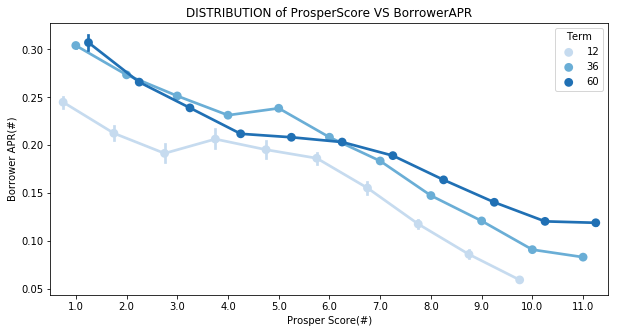

In [23]:
#plot pointplot 
fig = plt.figure(figsize = [10,5])
ax = sb.pointplot(data = loan_sub, x = 'ProsperScore', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '-',dodge = 0.5)

#Call the labels function
labels("Prosper Score(#)","Borrower APR(#)","DISTRIBUTION of ProsperScore VS BorrowerAPR");

Comments : There is an impact of **Loan term** for each **negative regression** presented here.

## Multivariate Correlation : 'ProsperScore' VS 'BorrowerRate' and 'IsBorrowerHomeowner'

The relation between **ProsperScore** and **BorrowerRate** is presented and the cases where the Borrower is Home Owner

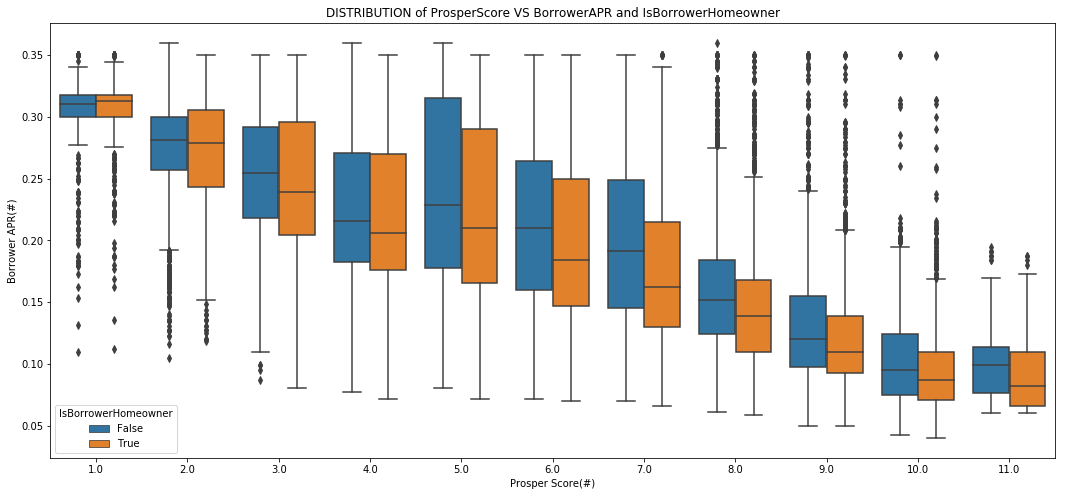

In [24]:
#Set the figure size
plt.figure(figsize = [18, 8])
#Plot a Boxplot
sb.boxplot(data=loan_sub, x='ProsperScore', y='BorrowerRate', hue='IsBorrowerHomeowner');

#Call the labels function
labels("Prosper Score(#)","Borrower APR(#)","DISTRIBUTION of ProsperScore VS BorrowerAPR and IsBorrowerHomeowner");

Comments : There is a **negative correlation** between **ProsperScore** and **BorrowerRate**. The correlation is almost the same if the Borrower is home owner or not

## Loan term Distribution

The distribution of Loan Term in the Dataset

In [25]:
#Function to change size of the graph
def Resize(a,b):
    from matplotlib import rcParams
    rcParams['figure.figsize'] = a,b

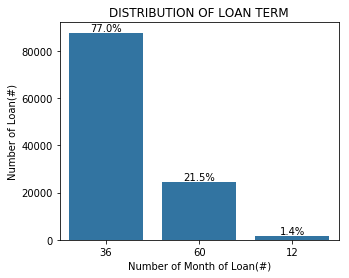

In [26]:
#Resizing the plot
Resize(5,4);

#Plot the 1st Univariate Visualization 
type_order = loan_sub['Term'].value_counts().index;
sb.countplot(data=loan_sub, x='Term', color=sb.color_palette()[0], order=type_order);

#Plotting the percentages
NB=loan_sub['Term'].value_counts().sum();
for i in range (loan_sub['Term'].value_counts().shape[0]):
    count = loan_sub['Term'].value_counts().values[i]
    pct_string = '{:0.1f}%'.format(100*count/NB)
    plt.text(i, count+4000, pct_string, ha = 'center', va='top')
    
#Call the labels function
labels("Number of Month of Loan(#)","Number of Loan(#)","DISTRIBUTION OF LOAN TERM")

Comments : **77%** of Loan term are for **3 Years (36 months)** and **21.5%** are for **5 years(60 Months)**. Only **1.4%** are for **1 Year(12 Months)**.

## Borrower Status Distribution

We'll predent here the Borrower Status Distribution

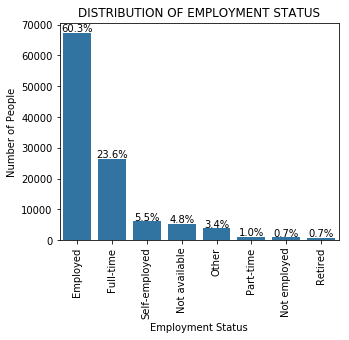

In [27]:
#Adjusting the size
Resize(5,4);

#Plot the 1st Univariate Visualization 
type_order = loan_sub['EmploymentStatus'].value_counts().index;
sb.countplot(data=loan_sub, x='EmploymentStatus', color=sb.color_palette()[0], order=type_order);
plt.xticks(rotation=90);

#Plotting labels
NB=loan_sub['EmploymentStatus'].value_counts().sum() #Denominator for the rate calculation
for i in range (loan_sub['EmploymentStatus'].value_counts().shape[0]):
    count = loan_sub['EmploymentStatus'].value_counts().values[i]
    pct_string = '{:0.1f}%'.format(100*count/NB)
    plt.text(i, count+3000, pct_string, ha = 'center', va='top')

#Call the labels function
labels("Employment Status","Number of People","DISTRIBUTION OF EMPLOYMENT STATUS")

Comments : 60.3% of Borrowers are **Employed** <br> **5.5%** are **Self-Employed** <br> **0.7%** are **not Employed**

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [28]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_slide_deck_template.ipynb>.ipynb --to slides --post serve

SyntaxError: invalid syntax (<ipython-input-28-3744ea308fd6>, line 2)

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
